In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

#Clean up the passenger titles and combine the small title groups.
def titleAdjustment(x):
    pro = ['Rev', 'Dr', 'Major', 'Col', 'Capt']
    vip = ['Don', 'Lady', 'the Countess', 'Count', 'Sir', 'Jonkheer', 'Dona']
    if x in pro:
        return 0
    elif x in vip:
        return 1
    elif x == 'Mr':
        return 2
    elif x in ['Mlle', 'Ms', 'Miss']:
        return 3
    elif x in ['Mme', 'Mrs']:
        return 4
    else:
        return 5

#Turn the gender into a numerical variable
def genderAdjustment(x):
    if x == 'male':
        return 1
    else:
        return 0

#Turn the embarking location into a numerical variable
def locAdjustment(x):
    if x == 'Q':
        return 0
    elif x == 'C':
        return 1
    else:
        return 2

#Turn the fare variable into a categorical variable
def fareCategories(x):
    if x <= 50:
        return 0
    elif x > 50 and x <= 100:
        return 1
    elif x > 100 and x <= 150:
        return 2
    elif x > 150 and x <= 300:
        return 3
    else:
        return 4
    
#Turn the age variable into a categrical variable
def ageBins(age):
    if age <= 5:
        return 0
    elif age > 5 and age <= 15:
        return 1
    elif age > 15 and age <= 30:
        return 2
    elif age > 30 and age <= 50:
        return 3
    elif age > 50 and age <= 65:
        return 4
    else:
        return 5
    
#Load the datasets into a pandas dataframe    
dataset = pd.read_csv("train.csv")
testset = pd.read_csv("test.csv")
fullset = pd.concat([dataset, testset], sort=False)

#Fill in the missing embark values with the most probable value. Turn the variable into a numerical variable
dataset.Embarked = dataset.Embarked.fillna(dataset.Embarked.mode()[0])
testset.Embarked = testset.Embarked.fillna(testset.Embarked.mode()[0])
fullset.Embarked = fullset.Embarked.fillna(fullset.Embarked.mode()[0])
dataset.Embarked = dataset.Embarked.apply(lambda x: locAdjustment(x))
testset.Embarked = testset.Embarked.apply(lambda x: locAdjustment(x))
fullset.Embarked = fullset.Embarked.apply(lambda x: locAdjustment(x))

#Get the passenger's title from the name field
dataset['Title'] = dataset.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
testset['Title'] = testset.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())
fullset['Title'] = fullset.Name.apply(lambda x: x.split('.')[0].split(',')[1].strip())

#Fix up the titles and turn them into numerical values
dataset['Title'] = dataset.Title.apply(lambda x: titleAdjustment(x))
testset['Title'] = testset.Title.apply(lambda x: titleAdjustment(x))
fullset['Title'] = fullset.Title.apply(lambda x: titleAdjustment(x))

#Turn gender into a numerical value
dataset.Sex = dataset.Sex.apply(lambda x: genderAdjustment(x))
testset.Sex = testset.Sex.apply(lambda x: genderAdjustment(x))
fullset.Sex = fullset.Sex.apply(lambda x: genderAdjustment(x))

#Create a variable that provides each passenger's family size
dataset['FamSize'] = dataset.SibSp + dataset.Parch + 1
testset['FamSize'] = testset.SibSp + testset.Parch + 1
fullset['FamSize'] = fullset.SibSp + fullset.Parch + 1

#Make the fare specific for the individual passenger rather than leaving it as a family total
dataset['newFare'] = dataset.Fare / dataset.FamSize
testset['newFare'] = testset.Fare / testset.FamSize
fullset['newFare'] = fullset.Fare / fullset.FamSize

#There is a missing fare value for a 3rd class passenger. 
#Get the average fare for those passengers and fill in the blank with that value.
class3Fare = fullset.loc[fullset['Pclass'] == 3, 'newFare']
avgClass3Fare = np.mean(class3Fare)

dataset.newFare = dataset.newFare.fillna(np.mean(avgClass3Fare))
testset.newFare = testset.newFare.fillna(np.mean(avgClass3Fare))
fullset.newFare = fullset.newFare.fillna(np.mean(avgClass3Fare))

#Turn fare into a categorical value
dataset.newFare = dataset.newFare.apply(lambda x: fareCategories(x))
testset.newFare = testset.newFare.apply(lambda x: fareCategories(x))
fullset.newFare = fullset.newFare.apply(lambda x: fareCategories(x))

fullset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamSize,newFare
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2,2,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,4,2,0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,3,1,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2,4,2,0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2,2,1,0


In [2]:
#Ignore the warnings that will pop up
import warnings
warnings.filterwarnings(action="ignore")

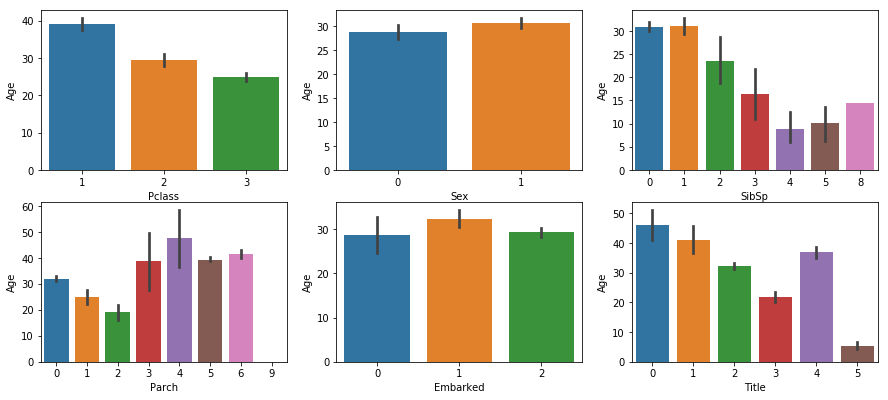

In [13]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#Plot some features to see if we can find any patterns that would help predict missing age values
plt.figure(figsize=[15,10])
plt.subplot(3,3,1)
sns.barplot('Pclass', 'Age', data = fullset)
plt.subplot(3,3,2)
sns.barplot('Sex', 'Age', data = fullset)
plt.subplot(3,3,3)
sns.barplot('SibSp', 'Age', data = fullset)
plt.subplot(3,3,4)
sns.barplot('Parch', 'Age', data = fullset)
plt.subplot(3,3,5)
sns.barplot('Embarked', 'Age', data = fullset)
plt.subplot(3,3,6)
sns.barplot('Title', 'Age', data = fullset)

#Select the variables we want to use to predict age
X = fullset.iloc[:, [2, 4, 6, 7, 11, 12, 13]].values
Y = fullset.iloc[:, [5]].values

y = Y[0]
x = X[0]

#We need to train our model on rows with an age value
i = 1
while i < len(Y):
    if not np.isnan(Y[i]):
        y = np.append(y, Y[i])
        x = np.vstack([x, X[i]])
    i += 1


trainX = x
trainY = y

In [4]:
#Try a random forest regressor to predict age
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=1)

#We will use grid search to try a number of different parameter combonations
paramRF = [{'n_estimators' : [10, 100, 1000], 'max_depth' : [1, 3, 6], 'criterion' : ['mse', 'mae']}]

#Tries all parameter combonations and returns the best one
gridRF = GridSearchCV(estimator = rf, param_grid = paramRF, scoring = 'neg_mean_absolute_error', cv = 3)

#Run cross validation to see how well the model performs
results = cross_val_score(gridRF, trainX, trainY, scoring = 'neg_mean_absolute_error', cv = 5)

print(np.mean(results))

-8.12030075677831


In [ ]:
#Try a simple neural network to predict age
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()

#We will use grid search to try a number of different parameter combonations
paramMLP = [{'hidden_layer_sizes' : [(100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100, 100), 
                                     (1000, 1000, 1000, 1000)], 
             'learning_rate_init' : [0.001, 0.0001, 0.01], 'solver' : ['adam']}]

#Tries all parameter combonations and returns the best one
gridMLP = GridSearchCV(estimator = mlp, param_grid = paramMLP, scoring = 'neg_mean_absolute_error', cv = 2)

#Run cross validation to see how well the model performs
results = cross_val_score(gridMLP, trainX, trainY, scoring = 'neg_mean_absolute_error', cv = 5)

print(np.mean(results))

In [5]:
#Try a support vector regressor to predict age
from sklearn.svm import SVR

svr = SVR()

#We will use grid search to try a number of different parameter combonations
r = [0.0001, 0.001, 0.1, 1, 10, 50, 100]
paramSVM = [{'C' : r, 'kernel' : ['linear']}, {'C' : r, 'kernel' : ['rbf']}]

#Tries all parameter combonations and returns the best one
gridSVM = GridSearchCV(estimator = svr, param_grid = paramSVM, scoring = 'neg_mean_absolute_error', cv = 2)

#Run cross validation to see how well the model performs
results = cross_val_score(gridSVM, trainX, trainY, scoring = 'neg_mean_absolute_error', cv = 5)

print(np.mean(results))

-8.236333655417571


Ages filled in!


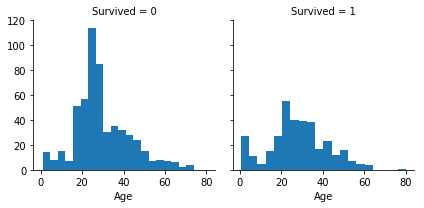

In [6]:
#Select the features to use to predict survival
X = dataset.iloc[:, [2, 4, 5, 6, 7, 11, 12, 13]].values
Y = dataset.iloc[:, [1]].values

#Random forest regressor produced the best results so use that to predict age
ageModel = gridRF.fit(trainX, trainY)

#Predict all age values that were not filled in
for row in X:
    if np.isnan(row[2]):
        x = np.hstack([row[:2], row[3:]])
        row[2] = ageModel.predict(np.expand_dims(x, axis = 0))
        
#Use a histogram to see if there are any age groups that should be grouped
df = pd.DataFrame({'Age': X[:,2], 'Survived': np.squeeze(Y, axis=(1,))})
        
g = sns.FacetGrid(df, col = 'Survived')
g.map(plt.hist, 'Age', bins = 20)

print("Ages filled in!")

In [7]:
#Turn the age values into categorical values
for row in X:
    row[2] = ageBins(row[2])

print(X)

[[3. 1. 2. ... 2. 2. 2.]
 [1. 0. 3. ... 1. 4. 2.]
 [3. 0. 2. ... 2. 3. 1.]
 ...
 [3. 0. 1. ... 2. 3. 4.]
 [1. 1. 2. ... 1. 2. 1.]
 [3. 1. 3. ... 0. 2. 1.]]


In [8]:
#Try using a support vector classifier to predict survival
from sklearn.svm import SVC

svc = SVC()

#We will use grid search to try a number of different parameter combonations
r = [0.0001, 0.001, 0.1, 1, 10, 50, 100]
paramSVC = [{'C' : r, 'kernel' : ['linear']},
      {'C' : r, 'gamma' : r, 'kernel' : ['rbf']}]

#Tries all parameter combonations and returns the best one
gridSVC = GridSearchCV(estimator = svc, param_grid = paramSVC, scoring = 'accuracy', cv = 2)

#Run cross validation to see how well the model performs
results = cross_val_score(gridSVC, X, Y, scoring = 'accuracy', cv = 5)

print(np.mean(results))

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

0.8294125052707881


C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

In [9]:
#Try using a random forest classifier to predict survival
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=2)

#We will use grid search to try a number of different parameter combonations
paramRF = [{'n_estimators':[10,100],'max_depth':[3,6],'criterion':['gini','entropy']}]

#Tries all parameter combonations and returns the best one
gridRF = GridSearchCV(estimator=RF, param_grid=paramRF, scoring='accuracy',cv=2)

#Run cross validation to see how well the model performs
results = cross_val_score(gridRF,X,Y,scoring='accuracy',cv=5)

print(np.mean(results))

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\habarker\AppData\Local\Continuum\anacond

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\habarker\AppData\Local\Continuum\anacond

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\habarker\AppData\Local\Continuum\anacond

0.8271904225390074


C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
#Try using a simple neural network to predict survival
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

#We will use grid search to try a number of different parameter combonations
paramMLP = [{'hidden_layer_sizes' : [(100, 100, 100), (100, 100, 100, 100), (100, 100, 100, 100, 100, 100), (1000, 1000, 1000, 1000)], 
             'learning_rate_init' : [0.001, 0.0001, 0.01], 'solver' : ['adam']}]

#Tries all parameter combonations and returns the best one
gridMLP = GridSearchCV(estimator = mlp, param_grid = paramMLP, scoring = 'accuracy', cv = 2)

#Run cross validation to see how well the model performs
results = cross_val_score(gridMLP, X, Y, scoring = 'accuracy', cv = 5)

print(np.mean(results))

In [10]:
#The support vector classifier performed the best so use that to predict survival
surviveModel = gridSVC.fit(X, Y)
print("Ready to predict!")

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\habarker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning

Ready to predict!


In [11]:
#Select the features from the test set to be used
X = testset.iloc[:, [1, 3, 4, 5, 6, 10, 11, 12]].values

#Fill in any missing age values
for row in X:
    if np.isnan(row[2]):
        x = np.hstack([row[:2], row[3:]])
        row[2] = ageModel.predict(np.expand_dims(x, axis = 0))

#Turn age into a categorical variable
for row in X:
    row[2] = ageBins(row[2])

print("Ages filled in!")

[3. 1. 3. 0. 0. 0. 2. 1.]
Ages filled in!


In [12]:
#Predict survival on the test set
predictions = surviveModel.predict(X)

#Write the predictions to the output file
passengerID = testset.iloc[:, 0]

c = open("results.csv", "w")

i = 0
passlen = len(passengerID)

c.write("PassengerID,Survived\n")

while i < passlen:
    line = str(passengerID[i]) + "," + str(predictions[i]) + "\n"
    c.write(line)
    print(line)
    i += 1
    
c.close()

892,0

893,1

894,0

895,0

896,1

897,0

898,1

899,0

900,1

901,0

902,0

903,0

904,1

905,0

906,1

907,1

908,0

909,0

910,1

911,1

912,0

913,1

914,1

915,0

916,1

917,0

918,1

919,0

920,0

921,0

922,0

923,0

924,1

925,1

926,0

927,0

928,1

929,1

930,0

931,0

932,0

933,0

934,0

935,1

936,1

937,0

938,0

939,0

940,1

941,1

942,0

943,0

944,1

945,1

946,0

947,0

948,0

949,0

950,0

951,1

952,0

953,0

954,0

955,1

956,1

957,1

958,1

959,0

960,0

961,0

962,1

963,0

964,1

965,0

966,1

967,0

968,0

969,1

970,0

971,1

972,1

973,0

974,0

975,0

976,0

977,0

978,1

979,1

980,1

981,1

982,1

983,0

984,1

985,0

986,0

987,0

988,1

989,0

990,1

991,0

992,1

993,0

994,0

995,0

996,1

997,0

998,0

999,0

1000,0

1001,0

1002,0

1003,1

1004,1

1005,1

1006,1

1007,0

1008,0

1009,1

1010,0

1011,1

1012,1

1013,0

1014,1

1015,0

1016,0

1017,1

1018,0

1019,1

1020,0

1021,0

1022,0

1023,0

1024,0

1025,0

1026,0

1027,0

1028,0

1029,0

1030